# Assignment #2
Machine Learning for the Social Sciences
Prof. Michael Parrot
18 October 2021
Yun Choi

## PART 1: Regression on California Test Scores

### 1. Find the url for the California Test Score Data Set from the following website: https://vincetarelbundock.github.io/Rdatasets/datasets.html

In [106]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
raw_data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
raw_data.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [107]:
# Delete first column
raw_data = raw_data.iloc[:, 1:]

# Delete variables that are not continuous and that are used to generate dependant variable
categorial_variables = ['distcod', 'county', 'district', 'grspan']
DV_related_variables = ['readscr', 'mathscr']

data = raw_data.drop(categorial_variables + DV_related_variables, axis = 1)
data.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [108]:
# Separate X and y data
y = data['testscr']
X = data.loc[:, data.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

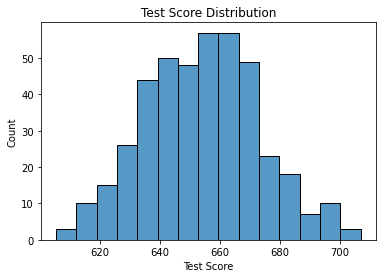

In [109]:
# Create a histogram of target feature
sns.histplot(y)
plt.title("Test Score Distribution")
plt.ylabel("Count")
plt.xlabel("Test Score");

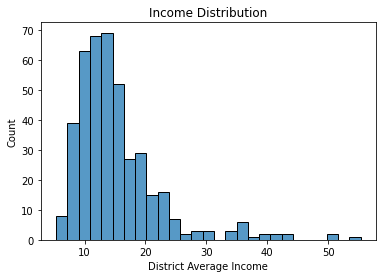

In [110]:
# Create a histogram of potential explanatory variable #1
sns.histplot(X['avginc'])
plt.title("Income Distribution")
plt.ylabel("Count")
plt.xlabel("District Average Income");

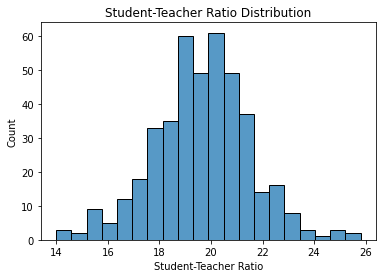

In [111]:
# Create a histogram of potential explanatory variable #2
sns.histplot(X['str'])
plt.title("Student-Teacher Ratio Distribution")
plt.ylabel("Count")
plt.xlabel("Student-Teacher Ratio");

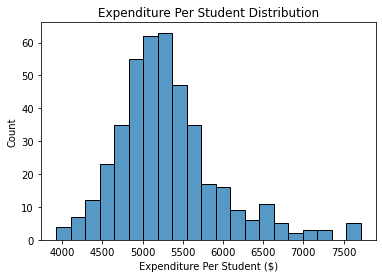

In [112]:
# Create a histogram of potential explanatory variable #3
sns.histplot(X['expnstu'])
plt.title("Expenditure Per Student Distribution")
plt.ylabel("Count")
plt.xlabel("Expenditure Per Student ($)");

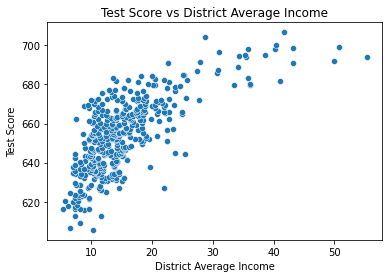

In [113]:
# Create a scatter plot with target and #1 possible explanatory variables
sns.scatterplot(x='avginc', y='testscr', data=data)
plt.title("Test Score vs District Average Income")
plt.ylabel("Test Score")
plt.xlabel("District Average Income");

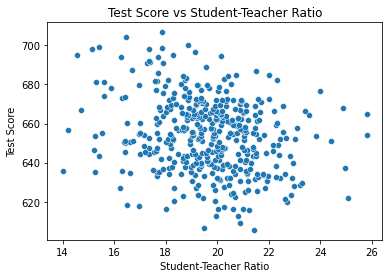

In [114]:
# Create a scatter plot with target and #2 possible explanatory variables
sns.scatterplot(x='str', y='testscr', data=data)
plt.title("Test Score vs Student-Teacher Ratio")
plt.ylabel("Test Score")
plt.xlabel("Student-Teacher Ratio");

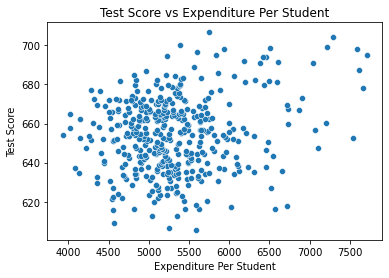

In [115]:
# Create a scatter plot with target and #3 possible explanatory variables
sns.scatterplot(x='expnstu', y='testscr', data=data)
plt.title("Test Score vs Expenditure Per Student")
plt.ylabel("Test Score")
plt.xlabel("Expenditure Per Student");

The scatter plots above show that only one of the three variables of my preliminary choice seems to have a solid partial effect on the target feature.

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [116]:
from sklearn.model_selection import train_test_split

# Split data in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import models, preprocessor, cross-validation score, and pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [117]:
knn_regressor = KNeighborsRegressor()
linear_regression = LinearRegression()
# Increase tol for Ridge and Lasso to allow converging
ridge = Ridge(tol=0.1)
lasso = Lasso(tol=0.1)

In [118]:
# Compare four models with raw data
regression_models = [knn_regressor, linear_regression, ridge, lasso]
for i in regression_models:
    print("Model:", i)
    print("  pre-scaling cross-validation score: {:.3f}".format(cross_val_score(i, X_train, y_train).mean()))
    print("  pre-scaling test-set score: {:.3f}".format(i.fit(X_train, y_train).score(X_test, y_test)))

Model: KNeighborsRegressor()
  pre-scaling cross-validation score: -0.054
  pre-scaling test-set score: 0.085
Model: LinearRegression()
  pre-scaling cross-validation score: 0.781
  pre-scaling test-set score: 0.807
Model: Ridge(tol=0.1)
  pre-scaling cross-validation score: 0.783
  pre-scaling test-set score: 0.807
Model: Lasso(tol=0.1)
  pre-scaling cross-validation score: 0.790
  pre-scaling test-set score: 0.807


In [119]:
# Scale data with StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-compare models with standardized data
models = [knn_regressor, linear_regression, ridge, lasso]
for i in models:
    print("Model:", i)
    print("  post-scaling score: {:.3f}".format(cross_val_score(i, X_train_scaled, y_train).mean()))
    print("  post-scaling test-set score: {:.3f}".format(i.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))

Model: KNeighborsRegressor()
  post-scaling score: 0.711
  post-scaling test-set score: 0.769
Model: LinearRegression()
  post-scaling score: 0.781
  post-scaling test-set score: 0.807
Model: Ridge(tol=0.1)
  post-scaling score: 0.783
  post-scaling test-set score: 0.807
Model: Lasso(tol=0.1)
  post-scaling score: 0.787
  post-scaling test-set score: 0.787


Standardizing the data has greatly improved the cross-validation and test-set scores of KNeighborRegressor, but the other models did not benefit much. The cross-validation score of KNeighborRegressor has improved from -0.054 to 0.711, and the test-set score has improved from 0.085 to 0.769. This implies that KNeighborRegressor is less effective in dealing with unstandardized data compared to the other models.

### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [120]:
# Create a geometric progression to feed in as alphas
a = 0.0001
r = 10
length = 8
alpha_geometric = [a * r ** (n - 1) for n in range(1, length + 1)]
alpha_geometric

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [121]:
from sklearn.model_selection import GridSearchCV

# Models to compare
models_for_gridsearch = {
    'KNeighborsRegressor': knn_regressor,
    'LinearRegression': linear_regression,
    'Ridge': ridge,
    'Lasso': lasso
}

# Optimisation parameters for each of above models
params_for_gridsearch = {
    'KNeighborsRegressor':{
        'n_neighbors': np.arange(1, 15, 2),
        'weights': ['uniform', 'distance']
    },
    'LinearRegression': {
    },
    'Ridge': {
        'alpha': alpha_geometric
    },
    'Lasso': {
        'alpha': alpha_geometric
    }
}

def fit(X_train_scaled, y_train, X_test_scaled, y_test):
    for name in models_for_gridsearch.keys():
        est = models_for_gridsearch[name]
        est_params = params_for_gridsearch[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
        gscv.fit(X_train_scaled, y_train)
        print("Model:", est)
        print("  best parameters: {}".format(gscv.best_params_))
        print("  best mean cross-validation score: {:.3f}".format(gscv.best_score_))
        print("  test-set score: {:.3f}".format(gscv.score(X_test_scaled, y_test)))

In [122]:
# Identify best parameters for each of above models
fit(X_train_scaled, y_train, X_test_scaled, y_test)

Model: KNeighborsRegressor()
  best parameters: {'n_neighbors': 11, 'weights': 'distance'}
  best mean cross-validation score: 0.726
  test-set score: 0.775
Model: LinearRegression()
  best parameters: {}
  best mean cross-validation score: 0.781
  test-set score: 0.807
Model: Ridge(tol=0.1)
  best parameters: {'alpha': 10.0}
  best mean cross-validation score: 0.786
  test-set score: 0.804
Model: Lasso(tol=0.1)
  best parameters: {'alpha': 0.1}
  best mean cross-validation score: 0.788
  test-set score: 0.806


**[KNeighborRegressor]** Increasing 'n_neighbors' and changing 'weights' to 'distance' has improved KNeighborRegressor's cross-validation and test-set scores from 0.711 to 0.726, and 0.769 to 0.775, respectively.

**[Linear Regression (OLS)]** Not applied.

**[Ridge]** The default 'alpha' value of 10 has turned out to be the best hyperparameters among the ones I fed in.

**[Lasso]** Lowering 'alpha' to 0.1 has improved Lasso's cross-validation and test-set scores from 0.787 to 0.788, and 0.787 to 0.806, respectively.

### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [123]:
# Best linear model #1: Linear Regression (OLS)
linear_regression.fit(X_train_scaled, y_train)
print("Model: Linear Regression (OLS)")
print("  Number of features used: {}".format(np.sum(linear_regression.coef_ != 0)))
print("  Coefficients: {}".format(list(zip(X.columns.values, linear_regression.coef_))))

Model: Linear Regression (OLS)
  Number of features used: 10
  Coefficients: [('enrltot', 0.9906880342456076), ('teachers', -1.936396144105509), ('calwpct', -1.1733305160353475), ('mealpct', -9.776462238396006), ('computer', 1.041836685475211), ('compstu', -0.09712146082210388), ('expnstu', 1.1538060457170978), ('str', -0.678849629861075), ('avginc', 3.719601988926351), ('elpct', -3.4784803042898313)]


In [124]:
# Best linear model #2: Lasso
lasso01 = Lasso(tol=0.1, alpha=0.1).fit(X_train_scaled, y_train)
print("Model: Lasso")
print("  Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))
print("  Coefficients: {}".format(list(zip(X.columns.values, lasso01.coef_))))

Model: Lasso
  Number of features used: 9
  Coefficients: [('enrltot', -0.8380766472038648), ('teachers', -0.001227901619292275), ('calwpct', -1.1620198414285863), ('mealpct', -10.485716694062612), ('computer', 0.7910366605693915), ('compstu', -0.0), ('expnstu', 1.228291645534172), ('str', -0.5904316850145157), ('avginc', 3.279250790129653), ('elpct', -2.979257660907094)]


My two best linear models are OLS and Lasso.

Both models agree that 'mealpct(% qualifying for reduced-price lunch)', 'avg_inc(district average income)', and 'elpct(% of English learners)' are the most important predictors in that order.

However, Lasso has one fewer predictors than OLS. It has zeroed out 'compstu(computer per student)' feature, possibly because of its high collinearity with 'computer(number of computers)' feature. Considering the number of computers per student is a more intuitive metric for student digital access, the model would have been more informative if 'computer' was zeroed out instead of 'compstu'.

### 1.6 Discuss which final model you would choose to predict new data.

Although the two models' cross-validation and test-set scores are equally high, I would choose Lasso as it has successfully removed one of the two features that basically mean the same thing: Student digital access. Keeping both features in the model poses a risk of multicollinearity.

## PART 2: Classification

In [125]:
# Import white wine data
raw_ww_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
raw_ww_data['winetype'] = 0
raw_ww_data.head()

# Import red wine data
raw_rw_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
raw_rw_data['winetype'] = 1
raw_rw_data.head()

# rbind white and red wine data sets
w_data = pd.concat([raw_ww_data, raw_rw_data], ignore_index=True)
w_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [126]:
# Separate X and y data
y = w_data['winetype']
X = w_data.loc[:, w_data.columns != 'winetype']

print(y[0:5])
X.head()

0    0
1    0
2    0
3    0
4    0
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

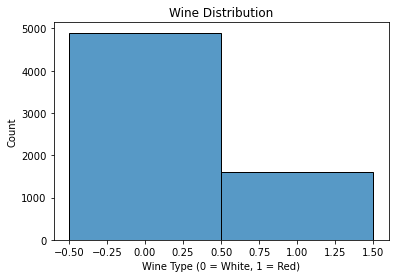

In [127]:
# Create a histogram of target feature
sns.histplot(y, discrete=True)
plt.title("Wine Distribution")
plt.ylabel("Count")
plt.xlabel("Wine Type (0 = White, 1 = Red)");

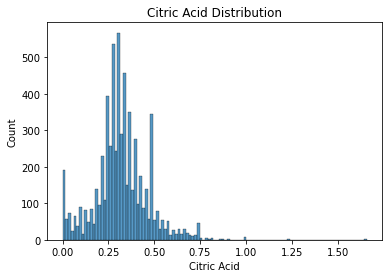

In [128]:
# Create a histogram of potential explanatory variable #1
sns.histplot(X['citric acid'])
plt.title("Citric Acid Distribution")
plt.ylabel("Count")
plt.xlabel("Citric Acid");

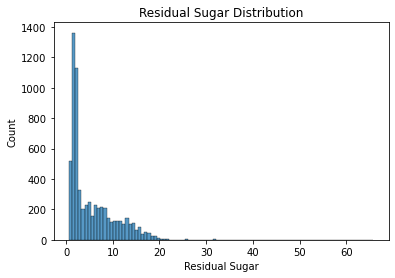

In [129]:
# Create a histogram of potential explanatory variable #2
sns.histplot(X['residual sugar'])
plt.title("Residual Sugar Distribution")
plt.ylabel("Count")
plt.xlabel("Residual Sugar");

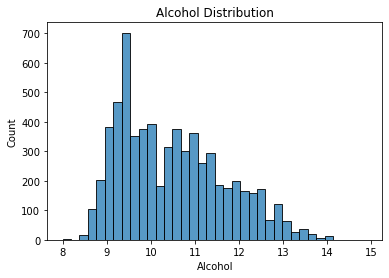

In [130]:
# Create a histogram of potential explanatory variable #3
sns.histplot(X['alcohol'])
plt.title("Alcohol Distribution")
plt.ylabel("Count")
plt.xlabel("Alcohol");

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [131]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [132]:
# Compare four models with raw data
classification_models = [logistic_regression, logistic_regression_l1, logistic_regression_l2,
                         knn_classifier]
for i in classification_models:
    print("Model:", i)
    print("  pre-scaling cross-validation score: {:.3f}".format(cross_val_score(i, X_train, y_train).mean()))
    print("  pre-scaling test-set score: {:.3f}".format(i.fit(X_train, y_train).score(X_test, y_test)))

Model: LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
  pre-scaling cross-validation score: 0.988
  pre-scaling test-set score: 0.987
Model: LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1)
  pre-scaling cross-validation score: 0.974
  pre-scaling test-set score: 0.967
Model: LogisticRegression(max_iter=100000, solver='liblinear', tol=0.1)
  pre-scaling cross-validation score: 0.935
  pre-scaling test-set score: 0.924
Model: KNeighborsClassifier()
  pre-scaling cross-validation score: 0.942
  pre-scaling test-set score: 0.936


In [133]:
# Standardize data with StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare four models with standardized data
for i in classification_models:
    print("Model:", i)
    print("  post-scaling cross-validation score: {:.3f}".format(cross_val_score(i, X_train_scaled, y_train).mean()))
    print("  post-scaling test-set score: {:.3f}".format(i.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))

Model: LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
  post-scaling cross-validation score: 0.994
  post-scaling test-set score: 0.993
Model: LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1)
  post-scaling cross-validation score: 0.991
  post-scaling test-set score: 0.990
Model: LogisticRegression(max_iter=100000, solver='liblinear', tol=0.1)
  post-scaling cross-validation score: 0.993
  post-scaling test-set score: 0.992
Model: KNeighborsClassifier()
  post-scaling cross-validation score: 0.993
  post-scaling test-set score: 0.991


Standardizing the data has improved both cross-validation and test-set scores for all of the models above.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [134]:
# Create a geometric progression to feed in as Cs
a = 0.0001
r = 10
length = 8
C_geometric = [a * r ** (n - 1) for n in range(1, length + 1)]
C_geometric

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [135]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# models to compare
models_for_gridsearch = {
    'LogisticRegression': logistic_regression,
    'LogisticRegression_L1': logistic_regression_l1,
    'LogisticRegression_L2': logistic_regression_l2,
    'KNeighborsClassifier': knn_classifier
}

# optimisation hyperparameters for each of the above models
params_for_gridsearch = {
    'LogisticRegression':{
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
    },
    'LogisticRegression_L1':{
        'C': C_geometric,
        'solver': ['liblinear', 'saga']
    },
    'LogisticRegression_L2':{
        'C': C_geometric,
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    },
    'KNeighborsClassifier':{
        'n_neighbors': np.arange(1, 15, 2),
        'weights': ['uniform', 'distance']
    }
}

def fit(X_train_scaled, y_train):
    for name in models_for_gridsearch.keys():
        est = models_for_gridsearch[name]
        est_params = params_for_gridsearch[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params)
        gscv.fit(X_train_scaled, y_train)
        print("Original model:", est)
        print("  new best hyperparameters: {}".format(gscv.best_params_))
        print("  best mean cross-validation score: {:.3f}".format(gscv.best_score_))
        print("  best test-set score: {:.3f}".format(gscv.score(X_test_scaled, y_test)))

In [136]:
fit(X_train_scaled, y_train)

Original model: LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
  new best hyperparameters: {'solver': 'newton-cg'}
  best mean cross-validation score: 0.994
  best test-set score: 0.993
Original model: LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1)
  new best hyperparameters: {'C': 1.0, 'solver': 'liblinear'}
  best mean cross-validation score: 0.993
  best test-set score: 0.990
Original model: LogisticRegression(max_iter=100000, solver='liblinear', tol=0.1)
  new best hyperparameters: {'C': 10.0, 'solver': 'lbfgs'}
  best mean cross-validation score: 0.994
  best test-set score: 0.993
Original model: KNeighborsClassifier()
  new best hyperparameters: {'n_neighbors': 13, 'weights': 'uniform'}
  best mean cross-validation score: 0.993
  best test-set score: 0.992


**[Non-penalized Logistic Regression]** The solver I originally chose has turned out to be the best one.

**[Penalized Logistic Regression(L1)]** Increasing C has slightly improved the scores.

**[Penalized Logistic Regression(L2)]** Increasing C and choosing 'lbfgs' for solver has slightly increased both cross-validation and test-set scores by 0.001.

**[KNeighborsClassifier]** Increasing n_neighbors to 13 has slightly increased the test-set score by 0.001.

### 2.4 Change the cross-validation strategy in GridSearchCV from 'stratified k-fold' to 'kfold' with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [137]:
# In GridSearchCV, for integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used.
# Change the cross-validation strategy in GridSearchCV to 'kfold' with shuffling
def fit_kfold_rs1(X_train_scaled, y_train):
    for name in models_for_gridsearch.keys():
        est = models_for_gridsearch[name]
        est_params = params_for_gridsearch[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=KFold(n_splits=5, shuffle = True, random_state = 1))
        gscv.fit(X_train_scaled, y_train)
        print("Original model:", est)
        print("  best hyperparameters: {}".format(gscv.best_params_))
        print("  best mean cross-validation score: {:.3f}".format(gscv.best_score_))
        print("  test-set score: {:.3f}".format(gscv.score(X_test_scaled, y_test)))
fit_kfold_rs1(X_train_scaled, y_train)

Original model: LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
  best hyperparameters: {'solver': 'newton-cg'}
  best mean cross-validation score: 0.994
  test-set score: 0.993
Original model: LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1)
  best hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
  best mean cross-validation score: 0.992
  test-set score: 0.988
Original model: LogisticRegression(max_iter=100000, solver='liblinear', tol=0.1)
  best hyperparameters: {'C': 10.0, 'solver': 'newton-cg'}
  best mean cross-validation score: 0.994
  test-set score: 0.993
Original model: KNeighborsClassifier()
  best hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
  best mean cross-validation score: 0.994
  test-set score: 0.995


Changing the cross-validation strategy in GridSearchCV from StratifiedKfold to Kfold with shuffling has changed the best hyperparameters for some models. For example, the best C for L1 has decreased to 1.0. Moreover, the best solver for L2 has changed from 'lbfgs' to 'newton-cg'. Lastly, the best 'n_neighbors' and 'weights' hyperparameters have also changed to '7' and 'distance', respectively.

In [138]:
# Change the random seed of the shuffling from 1 to 2
def fit_kfold_rs2(X_train_scaled, y_train):
    for name in models_for_gridsearch.keys():
        est = models_for_gridsearch[name]
        est_params = params_for_gridsearch[name]
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=KFold(n_splits=5, shuffle = True, random_state = 2))
        gscv.fit(X_train_scaled, y_train)
        print("Model:", est)
        print("  best hyperparameters: {}".format(gscv.best_params_))
        print("  best mean cross-validation score: {:.3f}".format(gscv.best_score_))
        print("  test-set score: {:.3f}".format(gscv.score(X_test_scaled, y_test)))

fit_kfold_rs2(X_train_scaled, y_train)

Model: LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
  best hyperparameters: {'solver': 'newton-cg'}
  best mean cross-validation score: 0.993
  test-set score: 0.993
Model: LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1)
  best hyperparameters: {'C': 100.0, 'solver': 'liblinear'}
  best mean cross-validation score: 0.993
  test-set score: 0.991
Model: LogisticRegression(max_iter=100000, solver='liblinear', tol=0.1)
  best hyperparameters: {'C': 10.0, 'solver': 'liblinear'}
  best mean cross-validation score: 0.994
  test-set score: 0.992
Model: KNeighborsClassifier()
  best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
  best mean cross-validation score: 0.994
  test-set score: 0.993


Changing the random seed of the suffling from 1 to 2 has also changed the best hyperparameters for some models.

In [139]:
# Change the random state of the split into training and test data from 42 to 43
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)

# Preprocess the data again with StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rerun with new random data
fit_kfold_rs1(X_train_scaled, y_train)

Original model: LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
  best hyperparameters: {'solver': 'newton-cg'}
  best mean cross-validation score: 0.995
  test-set score: 0.994
Original model: LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1)
  best hyperparameters: {'C': 1.0, 'solver': 'saga'}
  best mean cross-validation score: 0.992
  test-set score: 0.992
Original model: LogisticRegression(max_iter=100000, solver='liblinear', tol=0.1)
  best hyperparameters: {'C': 10.0, 'solver': 'liblinear'}
  best mean cross-validation score: 0.995
  test-set score: 0.993
Original model: KNeighborsClassifier()
  best hyperparameters: {'n_neighbors': 5, 'weights': 'uniform'}
  best mean cross-validation score: 0.993
  test-set score: 0.991


Changing state of the split into training and test data from 42 to 43 has also changed the best hyperparameters for some models.

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [140]:
# Returning to original split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Restandardize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the best non-penalized and penalized logistic regression models
retrained_logistic_regression = LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg', tol=0.1)
retrained_logistic_regression_l1 = LogisticRegression(max_iter=100000, penalty='l1', solver='liblinear', tol=0.1, C=10)
retrained_logistic_regression_l2 = LogisticRegression(max_iter=100000, penalty='l2', solver='lbfgs', tol=0.1, C=10)

In [141]:
# Non-penalized
retrained_logistic_regression.fit(X_train_scaled, y_train)
print("Non-Penalized Logistic Regression")
print("  Number of features used: {}".format(np.sum(retrained_logistic_regression.coef_ != 0)))
print(retrained_logistic_regression.coef_)
print(X.columns)
# density (positive), residual sugar(negative), total sulfur dioxide (positive) are important in that order

Non-Penalized Logistic Regression
  Number of features used: 12
[[-0.39385897  1.15835212 -0.46419165 -5.60104612  0.76040191  1.43455079
  -3.33588718  5.74100473 -0.2852445   0.44009941  2.31163117  0.18718105]]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [142]:
# L1
retrained_logistic_regression_l1.fit(X_train_scaled, y_train)
print("Logistic Regression (L1)")
print("  Number of features used: {}".format(np.sum(retrained_logistic_regression_l1.coef_ != 0)))
print(retrained_logistic_regression_l1.coef_)
print(X.columns)
# total sulfur dioxide is the most important

Logistic Regression (L1)
  Number of features used: 12
[[ 0.66972093  1.15832648 -0.31180332 -1.07252888  0.62804045  0.27467827
  -2.03981842  1.56027612  0.51665569  0.74071141  0.18304415  0.2491499 ]]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [143]:
# L2
retrained_logistic_regression_l2.fit(X_train_scaled, y_train)
print("Logistic Regression (L2)")
print("  Number of features used: {}".format(np.sum(retrained_logistic_regression_l2.coef_ != 0)))
print(retrained_logistic_regression_l2.coef_)
print(X.columns)
# density(positive), residual sugar(negative), total sulfur dioxide (negative) are important in that order

Logistic Regression (L2)
  Number of features used: 12
[[-0.23862835  1.18565441 -0.43751328 -5.16950643  0.76225472  1.33886034
  -3.24831862  5.2722352  -0.15828578  0.47566133  2.07932256  0.18200091]]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


The non-penalized logistic regression would be my first choice for this particular classification task, as it has the highest test-set score.

Ridge and Lasso regularizations are helpful when a regression model comprises a large number of features. They mitigate the issues of overfitting and multicollinearity by shrinking the coefficients in the model.

The handling of this small and dense wine data set does not require the employment of any regularization techniques. In fact, even the stricter L1 regularization, which is often used for feature selection, had not zeroed out any feature in this model. All 12 features are still being used.

Moreover, both Ridge and Lasso failed to increase the test score compared to the non-penalized model. Using regularization techniques requires the extra effort of setting additional parameters like C. In this task, where regularizations do not improve the model performance any better, it is not worth the effort.